In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('cars.csv')

In [3]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [5]:
data.shape

(261, 8)

In [6]:
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [7]:
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [19]:
No_of_Cars = data['brand'].value_counts()
No_of_Cars

brand
US.        160
Japan.      51
Europe.     48
Name: count, dtype: int64

In [20]:
# Convert weightlbs to numeric, coercing errors to NaN
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

# Drop rows with NaN values in weightlbs
data = data.dropna(subset=['weightlbs'])

data['weightlbs'] = data['weightlbs'].astype(int)

C:\Users\itspi\AppData\Local\Temp\ipykernel_1676\228019560.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weightlbs'] = data['weightlbs'].astype(int)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    int64  
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 18.0+ KB


In [23]:
data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [24]:
null_weightlbs = data['weightlbs'].isnull().sum()
null_weightlbs

np.int64(0)

In [30]:
# Select columns with object datatype
object_cols = data.select_dtypes(include=['object'])

# Find the number of null values in each object column
null_object_cols = object_cols.isnull().sum()
null_object_cols

brand    0
dtype: int64

Can you find that there is improvement in mpg over the years ?


C:\Users\itspi\AppData\Local\Temp\ipykernel_1676\2646631360.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='mpg', data=data, ci=None)


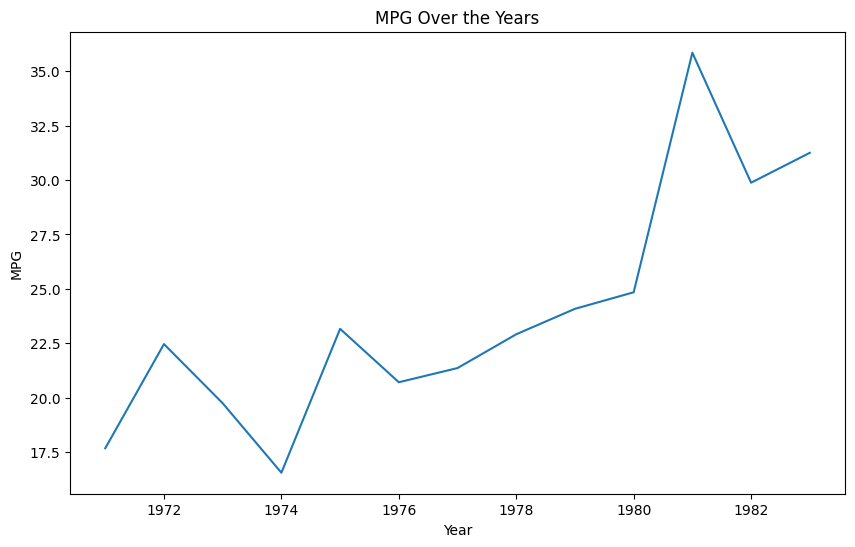

In [25]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='mpg', data=data, ci=None)
plt.title('MPG Over the Years')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.show()

In [33]:
#Converting cubicinches and weightlbs to numeric 
data_wo_year.replace({" ":0}, inplace = True)
data_wo_year['cubicinches'] = pd.to_numeric(data_wo_year['cubicinches'])
data_wo_year['weightlbs'] = pd.to_numeric(data_wo_year['weightlbs'])
data_wo_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    int64  
 5   time-to-60   256 non-null    int64  
 6   brand        256 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 16.0+ KB


Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?

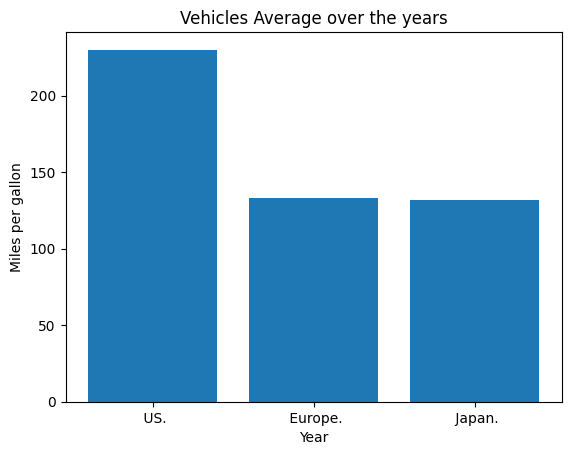

In [39]:
plt.bar(data_wo_year.brand, data_wo_year.hp)
plt.xlabel("Year")
plt.ylabel("Miles per gallon")
plt.title("Vehicles Average over the years")
plt.show()

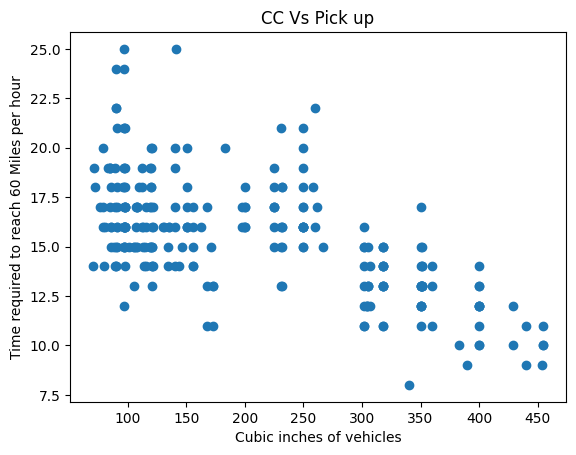

In [40]:
plt.scatter(data_wo_year.cubicinches , data_wo_year["time-to-60"])
plt.xlabel("Cubic inches of vehicles")
plt.ylabel("Time required to reach 60 Miles per hour")
plt.title("CC Vs Pick up")
plt.show()

From the analysis it is clear that certainly cubicinches affects the time required to reach 60 Mph for a vehicle. It varries in indirect proportion. So if cc is more time taken by vehicle to reach 60 mph is less and vice versa.

In [41]:
#Converting cubicinches and weightlbs to numeric 
data_wo_year.replace({" ":0}, inplace = True)
data_wo_year['cubicinches'] = pd.to_numeric(data_wo_year['cubicinches'])
data_wo_year['weightlbs'] = pd.to_numeric(data_wo_year['weightlbs'])
data_wo_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    int64  
 5   time-to-60   256 non-null    int64  
 6   brand        256 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 16.0+ KB


Does a specific country prefer vehicles with more horse power ?

<Axes: xlabel='None', ylabel='hp'>

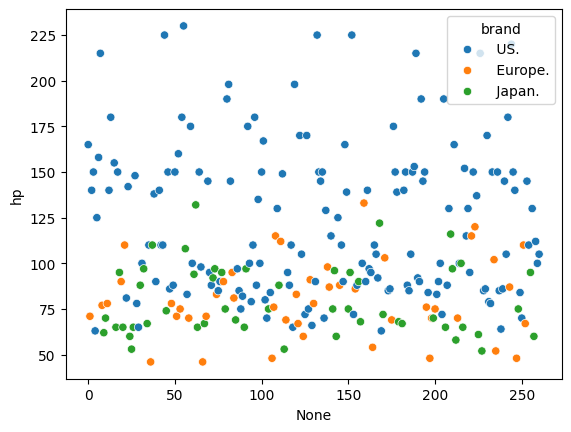

In [42]:
sns.scatterplot(x = data_wo_year.index ,y = data_wo_year.hp , hue = data_wo_year.brand)

From the analysis it seems that US vehicles mostly are with higher Horse power as compared to Europe and Japan.

How does the horse power affects the average of the vehicle ?


<Axes: xlabel='mpg', ylabel='hp'>

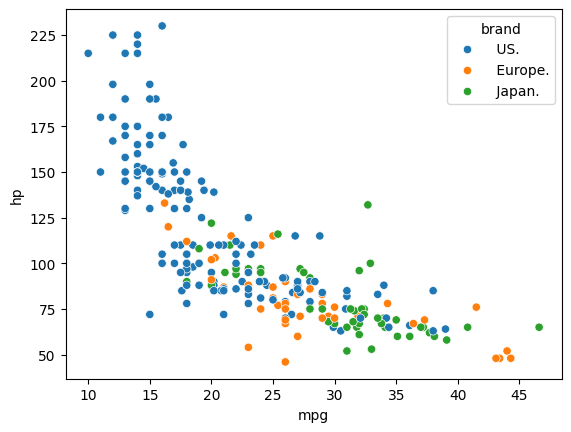

In [44]:
sns.scatterplot(x = data_wo_year.mpg ,y = data_wo_year.hp , hue = data_wo_year.brand)

It is evident that horse power is in inverse proportion with Average of the vehicle. As the one goes on increasing the other one drops.

What is the effect of number of cylinders on the mpg ?

<Axes: xlabel='mpg', ylabel='cylinders'>

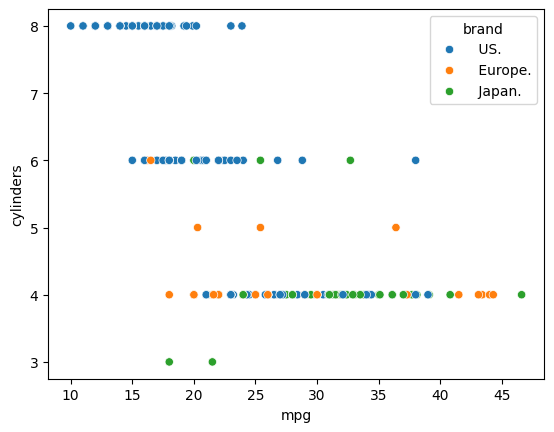

In [46]:
sns.scatterplot(x = data_wo_year.mpg ,y = data_wo_year.cylinders , hue = data_wo_year.brand)

C:\Users\itspi\AppData\Local\Temp\ipykernel_1676\577730849.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_3d = data_wo_year.replace({" US.":0," Europe.":1," Japan.":2})


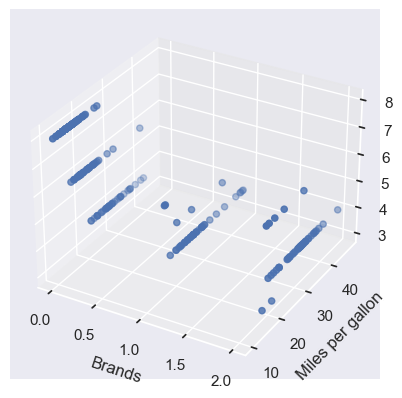

In [48]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

data_3d = data_wo_year.replace({" US.":0," Europe.":1," Japan.":2})

x = data_3d['brand']
y = data_3d['mpg']
z = data_3d['cylinders']

ax.set_xlabel("Brands")
ax.set_ylabel("Miles per gallon")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y,z)

plt.show()

It is evident that number of cylinders is in inverse proportion with Average of the vehicle. As the one goes on increasing the other one drops.

What relation between cubic inches , number of cylinders and horse power you can observe from the data ?

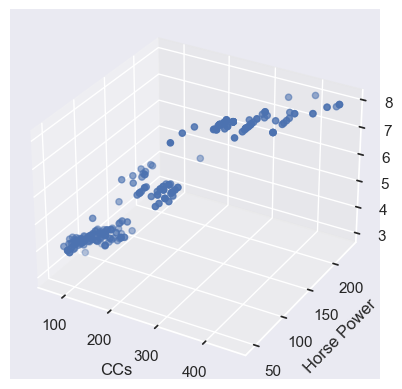

In [50]:
sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = data_3d['cubicinches']
y = data_3d['hp']
z = data_3d['cylinders']

ax.set_xlabel("CCs")
ax.set_ylabel("Horse Power")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y,z)

plt.show()

<Axes: xlabel='cubicinches', ylabel='hp'>

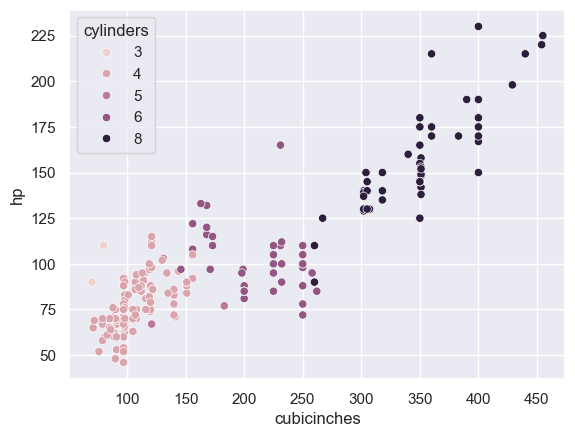

In [52]:
sns.scatterplot(x = data_wo_year.cubicinches ,y = data_wo_year.hp , hue = data_wo_year.cylinders)

It is evident that cubic inches , number of cylinders and horse power are in direct proportion with each other.

How much proportion of the total records is occupied by vehicles with 8 cylinders ?

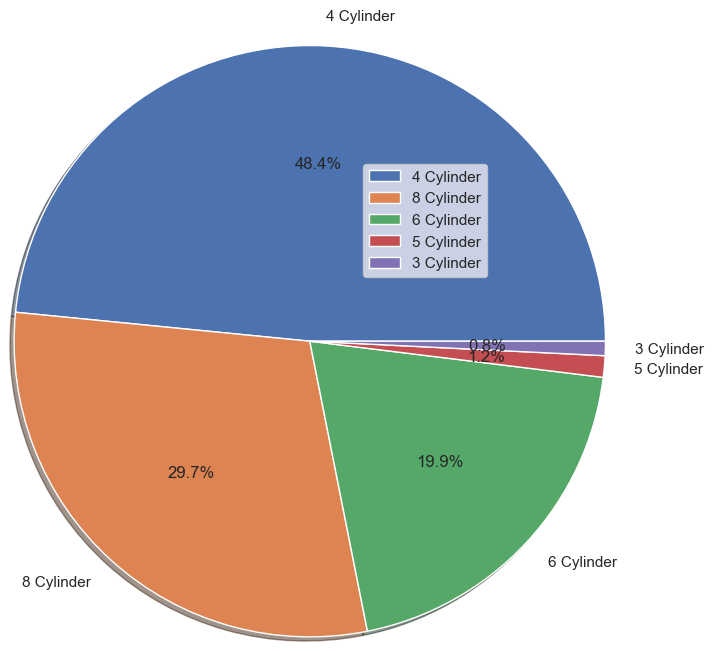

In [55]:
plt.pie(data_wo_year.cylinders.value_counts(),labels = ["4 Cylinder","8 Cylinder","6 Cylinder","5 Cylinder","3 Cylinder"],autopct='%1.1f%%',shadow = True,radius= 2)
plt.legend(loc ="upper right")

In [54]:
data_wo_year.cylinders.value_counts()

cylinders
4    124
8     76
6     51
5      3
3      2
Name: count, dtype: int64

Roughly around 30 % of the vehicles enlisted in the data are with 8 Cylinders.